<a href="https://colab.research.google.com/github/priyanka-261296/NN-Classification/blob/main/Copy_of_NN_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**#Import All Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


**#Import Dataset**

In [ ]:
df=pd.read_csv("/content/insurance.csv")


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


**#Separating X and Y**

In [ ]:
y = df["insuranceclaim"]
X = df.drop("insuranceclaim",axis=1)

**#Training and Testing**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

**# Scaling data**

In [ ]:
ss = StandardScaler()

In [ ]:
X_train_ss = ss.fit_transform(X_train)

In [ ]:
X_test_ss = ss.transform(X_test)

**# Neural Network**

In [ ]:
model = tf.keras.Sequential([
    
    tf.keras.layers.Dense(2, activation="relu", input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(3, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
    
])

**#Model Summary**

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 2)                 16        
_________________________________________________________________
dense_16 (Dense)             (None, 3)                 9         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 4         
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy")

In [ ]:
trained_model = model.fit(X_train_ss, y_train, epochs=50,batch_size=10)

Epoch 1/50
94/94 [==============================] - 1s 1ms/step - loss: 0.6813
Epoch 2/50
94/94 [==============================] - 0s 1ms/step - loss: 0.6706
Epoch 3/50
94/94 [==============================] - 0s 1ms/step - loss: 0.6552
Epoch 4/50
94/94 [==============================] - 0s 2ms/step - loss: 0.6350
Epoch 5/50
94/94 [==============================] - 0s 1ms/step - loss: 0.6110
Epoch 6/50
94/94 [==============================] - 0s 1ms/step - loss: 0.5882
Epoch 7/50
94/94 [==============================] - 0s 1ms/step - loss: 0.5685
Epoch 8/50
94/94 [==============================] - 0s 1ms/step - loss: 0.5509
Epoch 9/50
94/94 [==============================] - 0s 1ms/step - loss: 0.5357
Epoch 10/50
94/94 [==============================] - 0s 1ms/step - loss: 0.5222
Epoch 11/50
94/94 [==============================] - 0s 1ms/step - loss: 0.5103
Epoch 12/50
94/94 [==============================] - 0s 2ms/step - loss: 0.4996
Epoch 13/50
94/94 [==============================

**#EDA**

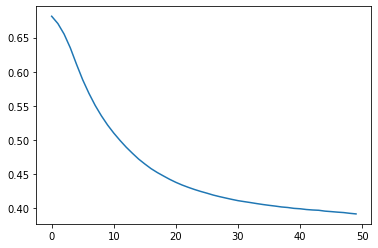

In [ ]:
plt.plot(trained_model.history["loss"])

**# Testing**

In [ ]:
y_pred = model.predict(X_test_ss)

In [ ]:
y_pred

array([[0.8765453 ],
       [0.8765453 ],
       [0.8765453 ],
       [0.2542108 ],
       [0.07302305],
       [0.86978775],
       [0.6931434 ],
       [0.769889  ],
       [0.5120049 ],
       [0.8765453 ],
       [0.5396519 ],
       [0.8589605 ],
       [0.31056   ],
       [0.3960903 ],
       [0.8765453 ],
       [0.23304525],
       [0.3377365 ],
       [0.02181703],
       [0.8747355 ],
       [0.8765453 ],
       [0.8765453 ],
       [0.8572645 ],
       [0.67780036],
       [0.6634147 ],
       [0.69106376],
       [0.3981392 ],
       [0.0302549 ],
       [0.8765453 ],
       [0.26313198],
       [0.48877248],
       [0.8505915 ],
       [0.08709425],
       [0.35828987],
       [0.8765453 ],
       [0.54721534],
       [0.53314006],
       [0.8765453 ],
       [0.15277553],
       [0.8765453 ],
       [0.8765453 ],
       [0.24938136],
       [0.8765453 ],
       [0.03343469],
       [0.8765453 ],
       [0.02774468],
       [0.8245362 ],
       [0.73767436],
       [0.876

In [ ]:
y_pred = np.where(y_pred >= 0.5,1,0)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       157
           1       0.91      0.91      0.91       245

    accuracy                           0.89       402
   macro avg       0.88      0.89      0.89       402
weighted avg       0.89      0.89      0.89       402

